In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import cv2
import glob
import os

In [3]:
model_idx = 1
models_path = glob.glob("./Models/*")
print(models_path)

model = load_model(models_path[model_idx])
model.summary()

['./Models\\DenseNetFull.h5', './Models\\InceptionV3.h5', './Models\\model.h5', './Models\\modelsegmented.h5', './Models\\SegInceptionV3.h5', './Models\\segmentedDenseNetFull.h5', './Models\\VGG16.h5']
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 192, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 95, 127, 32)  864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 95, 127, 32)  96         ['conv2d[0][0]']         

In [9]:
test_images_classes = os.listdir("./test_images")
print(test_images_classes)

class_idx = 1
print(test_images_classes[class_idx])
test_images = glob.glob("./test_images/"+test_images_classes[class_idx]+"/*.jpg")
print(len(test_images))

['Actinic_keratoses', 'Basal_cell_carcinoma', 'Benign_keratosis-like_lesions', 'Dermatofibroma', 'Melanocytic_nevi', 'melanoma', 'Vascular_lesions']
Basal_cell_carcinoma
453


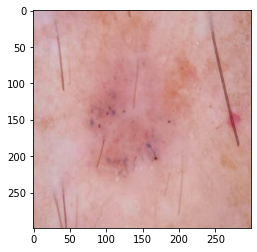

In [12]:
img_idx = 0
img = cv2.imread(test_images[img_idx])
imshow(img[:,:,::-1])

In [13]:
output = model.predict(cv2.resize(img, tuple(model.input.shape[::-1][1:-1]))[np.newaxis,:])
output = argmax(output)
lesion_type_dict = {
    'nv': 'Melanocytic_nevi',
    'mel': 'melanoma',
    'bkl': 'Benign_keratosis-like_lesions',
    'bcc': 'Basal_cell_carcinoma',
    'akiec': 'Actinic_keratoses',
    'vasc': 'Vascular_lesions',
    'df': 'Dermatofibroma'
}
print(list(lesion_type_dict.values())[output])

Actinic_keratoses
